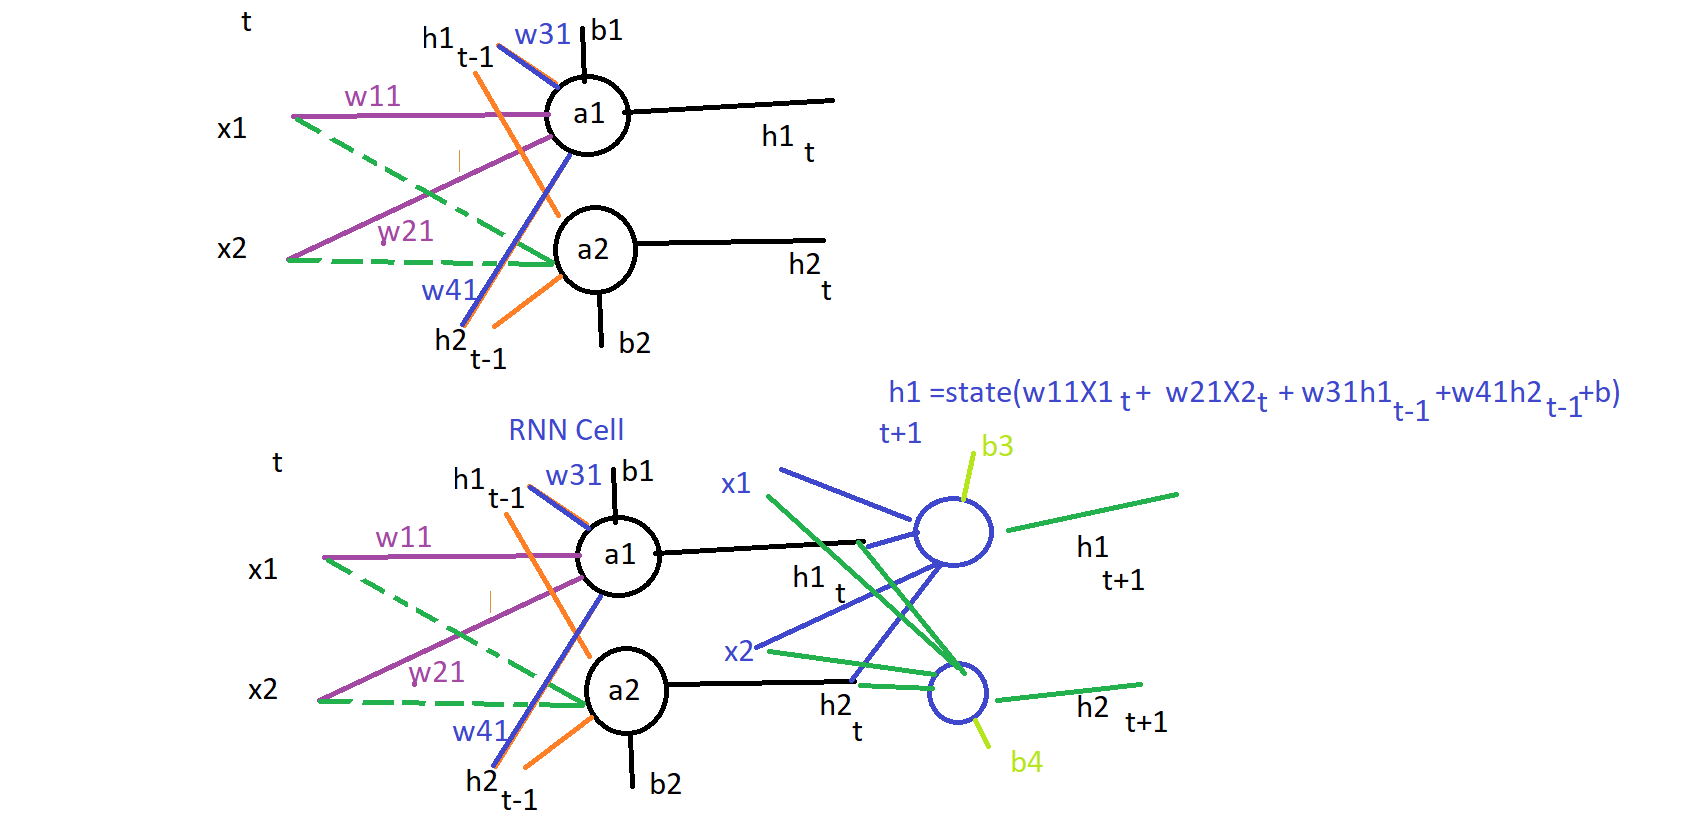

In [2]:
from google.colab.patches import cv_imshow
import cv2
x = cv2.imread('RNN.png')
cv_imshow(x)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [12]:
def rnn_model(time_steps, n_inputs):
  inputcell = layers.Input(shape=(time_steps, n_inputs))
  rnn_cell = layers.SimpleRNN(units=3)(inputcell)
  output_layer = layers.Dense(units=10, activation='softmax')(rnn_cell)
  net = keras.Model(inputs=inputcell, outputs = output_layer)
  return net

In [14]:
rnnmodel = rnn_model(5,1)

In [15]:
rnnmodel.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 5, 1)]            0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 3)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                40        
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________


In [20]:
def lstm_model(timesteps, inputs):
  inputcell = layers.Input(shape=(timesteps, inputs))
  lstm_cell = layers.LSTM(units=3)(inputcell)
  output_layer = layers.Dense(units=10, activation='softmax')(lstm_cell)
  net = keras.Model(inputs=inputcell, outputs = output_layer)
  return net

In [21]:
lstmmodel = lstm_model(5,1)

In [22]:
lstmmodel.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 5, 1)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 3)                 60        
_________________________________________________________________
dense_3 (Dense)              (None, 10)                40        
Total params: 100
Trainable params: 100
Non-trainable params: 0
_________________________________________________________________


In [27]:
model = keras.Sequential()
model.add(layers.LSTM(50, activation='relu', input_shape=(3, 1)))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

In [29]:
rawdata = [10,20,30,40,50,60,70,80,90]
def split_sequence(seq, steps):
  x,y = list(), list()
  for i in range(len(seq)):
    endindex = i+steps
    if endindex > len(seq) -1:
      break
    xsq, ysq = seq[i:endindex], seq[endindex]
    x.append(xsq)
    y.append(ysq)
  return x,y
x,y = split_sequence(rawdata, 3)


In [30]:
x

[[10, 20, 30],
 [20, 30, 40],
 [30, 40, 50],
 [40, 50, 60],
 [50, 60, 70],
 [60, 70, 80]]

In [31]:
y

[40, 50, 60, 70, 80, 90]

In [34]:
# reshape and fit data into model
x = np.array(x)
x = x.reshape((x.shape[0], x.shape[1], 1))

In [35]:
y = np.array(y)

In [36]:
%%time
model.fit(x, y, epochs=200, verbose=0)

CPU times: user 2.33 s, sys: 119 ms, total: 2.45 s
Wall time: 2.48 s


In [45]:
testx = np.array([30, 40, 50]) # expected answer is close to 60
testx = testx.reshape((1, 3, 1))

In [46]:
predictions = model.predict(testx)

In [47]:
predictions

array([[59.874687]], dtype=float32)

In [48]:
# longer stacked memory
stackedmodel = keras.Sequential()
stackedmodel.add(layers.LSTM(50, activation='relu', return_sequences=True, input_shape=(3, 1)))
stackedmodel.add(layers.LSTM(50, activation='relu'))
stackedmodel.add(layers.Dense(1))
stackedmodel.compile(optimizer='adam', loss='mse')

In [49]:
%%time
stackedmodel.fit(x, y, epochs=200, verbose=0)

CPU times: user 4.17 s, sys: 130 ms, total: 4.3 s
Wall time: 3.8 s


In [50]:
predictions2 = stackedmodel.predict(testx)
predictions2

array([[59.44516]], dtype=float32)

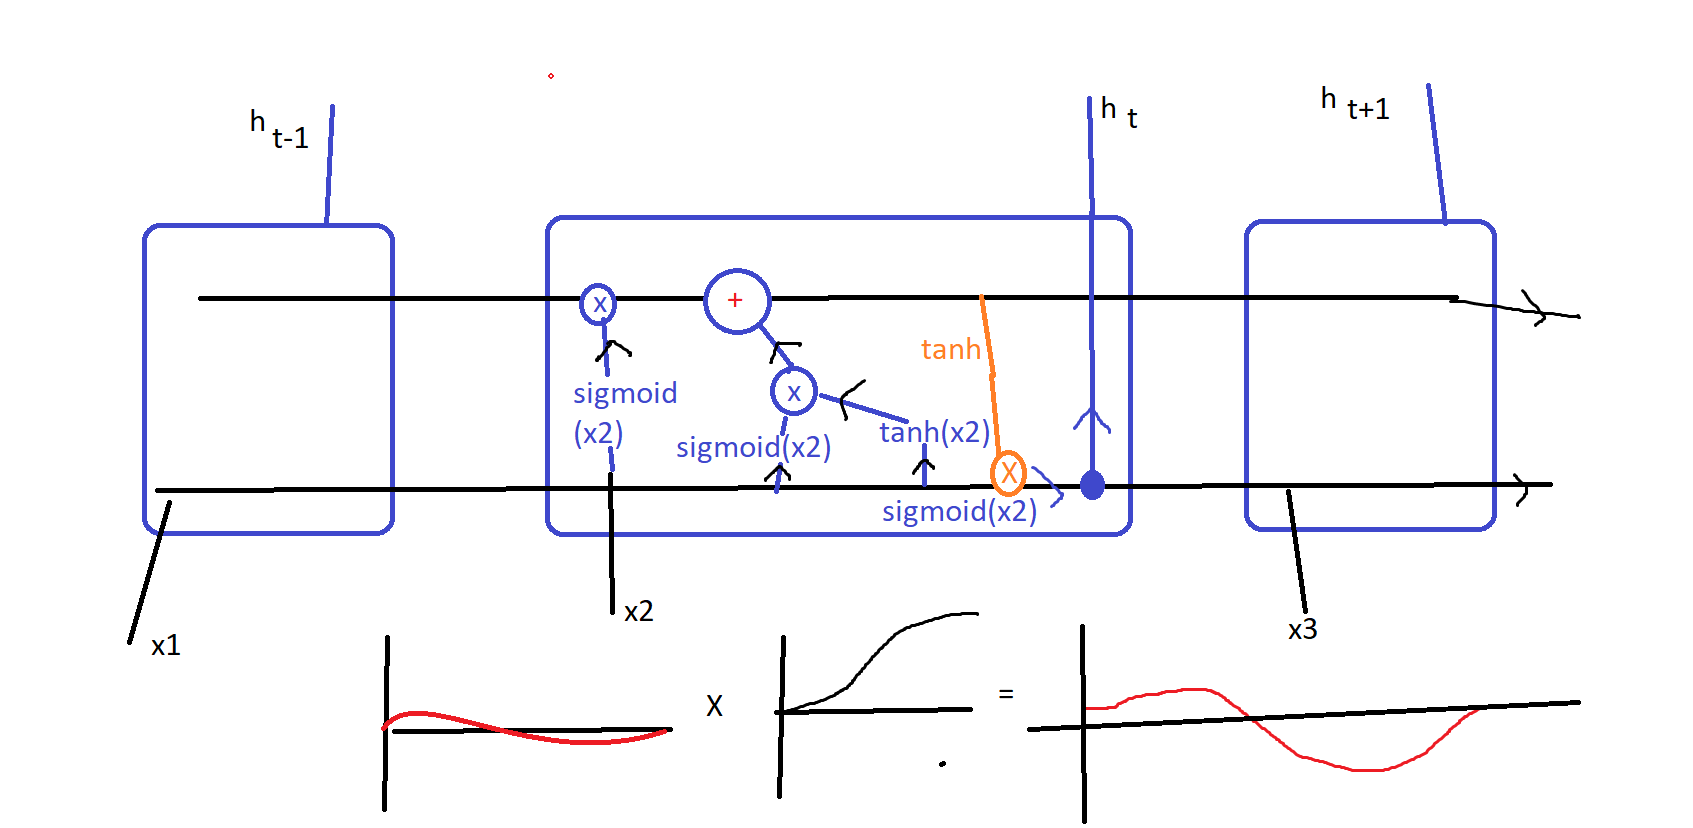

In [51]:
x = cv2.imread('lstm.png')
cv_imshow(x)